In [1]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
import requests
from bs4 import BeautifulSoup
import re

!pip install profanity

In [2]:
import praw

reddit = praw.Reddit(
    client_id="IISZRvsPo8OBGV06-x_D1Q",
    client_secret="sX4K-1ciu8fAIer3m0KHMy2riJs0yw",
    user_agent="Python:SIN project:v1.0 (by /u/Mundane_Trick3335)",
)

Version 7.6.1 of praw is outdated. Version 7.7.0 was released Saturday February 25, 2023.


In [34]:
prolife_subreddits = [                                         
    "prolife",    
    "MarchForLife",    
    "Abortiondebate",    
    "ProLifeLibertarians",    
    "AbolishAbortion",       
    "StudentsForLife",              
    "RightToLife",                    
    "AbortionRegret",                                           
    "ProLifeMemes",           
    "ProLifeVegan" 
]

In [35]:
pro_choice_subreddits = [                                                   
    "prochoice",    
    "abortion",    
    "PlannedParenthood",    
    "ReproJustice",       
    "BirthControl",                          
    "LateTermAbortion",
    "AbortionAccess",    
    "MyBodyMyChoice",
    "WomenHealthcare",        
    "reproductivejustice",    
    "ReproductiveRights",        
]

In [39]:
mixed = [
    "SocialJustice",    
    "Activism", 
    "Progressive",
    "Abortiondebate",
    "WomensHealth",
    "Healthcare",
    "Feminism",    
    "FeministTheory",
    "EqualRights",
    "TwoXChromosomes",
    "PlannedParenthood"
]

In [40]:
combined_list=prolife_subreddits+pro_choice_subreddits+mixed
combined_list

['prolife',
 'MarchForLife',
 'Abortiondebate',
 'ProLifeLibertarians',
 'AbolishAbortion',
 'StudentsForLife',
 'RightToLife',
 'AbortionRegret',
 'ProLifeMemes',
 'ProLifeVegan',
 'prochoice',
 'abortion',
 'PlannedParenthood',
 'ReproJustice',
 'BirthControl',
 'LateTermAbortion',
 'AbortionAccess',
 'MyBodyMyChoice',
 'WomenHealthcare',
 'reproductivejustice',
 'ReproductiveRights',
 'SocialJustice',
 'Activism',
 'Progressive',
 'Abortiondebate',
 'WomensHealth',
 'Healthcare',
 'Feminism',
 'FeministTheory',
 'EqualRights',
 'TwoXChromosomes',
 'PlannedParenthood']

In [41]:
for subreddit in combined_list:
    for submission in reddit.subreddit(subreddit).hot(limit=1):
        print(subreddit, ": ", submission.title)

prolife :  Need Links/Phone Numbers/ Resources for crisis pregnancy centers and others akin
MarchForLife :  Hartford March for Life
Abortiondebate :  Rules and Debate Resources
ProLifeLibertarians :  Norfolk Agricultural High School Teaching Students Fetal Development - NewBostonPost
AbolishAbortion :  Get free PL stickers, fact cards, fliers and more! (And please consider making a donation)
StudentsForLife :  ONLINE MOVIE "National Treasure 2004" viooz now HDTS megashare dubbed thepiratebay DVDRip BrRip
RightToLife :  This is the lunacy you support
AbortionRegret :  Grief
ProLifeMemes :  Meta 1.0
ProLifeVegan :  r/ProLifeVegan Lounge
prochoice :  Just FYI, medication abortion is safe
abortion :  WELCOME TO r/abortion! PLEASE READ THIS BEFORE POSTING OR COMMENTING
PlannedParenthood :  Unnecessary trans abdominal ultrasound at Planned Parenthood? (non pregnant)
ReproJustice :  The best offense is more clinic defense
BirthControl :  Mistake or Pregnancy Concern/Risk? Start here!
LateTerm

# Sentiment Analysis

In [8]:
tokenizer = AutoTokenizer.from_pretrained('cardiffnlp/twitter-roberta-base-stance-abortion')
model = AutoModelForSequenceClassification.from_pretrained('cardiffnlp/twitter-roberta-base-stance-abortion')

In [31]:
def relevant_comment(text):
    keywords = ["pro-life", "pro-choice", "abortion", "fetus", "pregnancy", "reproductive rights", "women's rights", "roe v. wade", "contraception", "termination", "embryo", "planned parenthood", "ultrasound", "adoption", "parental", "consent", "incest", "rape", "maternal", "unsafe", "anti-choice", "healthcare access", "education", "teen pregnancy", "ife", "abortion pill", "late-term", "back-alley", "health"]
    new_keywords = ["heartbeat","brain","conception","ban","child", "access", "reproductive", "healthcare", "women's autonomy", "rights","women", "personhood", "sanctity of life", "conscience clause", "abortion restriction", "procedure","quality","child","children","development","functioning"]
    final_keywords=keywords+new_keywords
    for word in final_keywords:
        if word in text.lower():
            return True
    return False

In [11]:
def sentiment_score(comment):
    tokens = tokenizer.encode(comment, return_tensors='pt')
    result = model(tokens)
    return int(torch.argmax(result.logits))+1

# Profanity check

In [47]:
from profanity import profanity
profanity.contains_profanity("I strongly believe that women should be allowed the right to freedom")

False

# Fetch Post and Comments

In [30]:
for submission in reddit.subreddit(combined_list[0]).hot(limit=3):
    print("Post Title ", submission.title)
    
    top_level_comment_count = 0
    for top_level_comment in submission.comments:
        print("top level comment: ", top_level_comment.body[0:30], '...')
        
        for second_level_comment in top_level_comment.replies:
            print("\tsecond level comment: ", second_level_comment.body[0:30], '...')
            
            for third_level_comment in second_level_comment.replies:
                print("\t\tthird level comment: ", third_level_comment.body[0:30], '...')
            
        top_level_comment_count += 1
        if top_level_comment_count == 3:
            break
        print()
    
    print("--------------------------")
    print()



Post Title  Need Links/Phone Numbers/ Resources for crisis pregnancy centers and others akin
top level comment:  **International resource regis ...
	second level comment:  US pregnancy map should be rem ...

top level comment:  Irish pro-life pregnancy centr ...
	second level comment:  Gallimh abu ...

top level comment:  These sites routinely host fun ...
--------------------------

Post Title  Pro Life Weekly Chat!
top level comment:  So anyone here play super robo ...
	second level comment:  No, but that sounds really fun ...
		third level comment:  https://youtu.be/GxzMmMeusD4 ...

--------------------------

Post Title  6-week abortion ban passes Florida House, heads to DeSantis
top level comment:  Just looking at the signs in t ...
	second level comment:  they don't have any serious ar ...

top level comment:  “FREE ABORTION ON DEMAND!” Pro ...

top level comment:  >Jazmyn Williams, 22, of St. P ...
	second level comment:  "I was born" should be the end ...
		third level comment:

# Comment classification & Echochamber Identification

In [97]:
total_post_count = 0
prochoice_echochamber_count = 0
prolife_echochamber_count = 0
mixed_post_count = 0

total_comment_count = 0
total_relevant_comment_count = 0
prochoice_comment_count = 0
prolife_comment_count = 0

total_profanity_comment_count = 0
prochoice_profanity_comment_count = 0
prolife_profanity_comment_count = 0


for subreddit in combined_list: 
    
    post_count = 0
    
    subr_prochoice_comments = 0
    subr_prolife_comments = 0
    subr_total_comments = 0
    subr_profanity_comments = 0
    
    print(subreddit)
    
    for submission in reddit.subreddit(subreddit).hot(limit=10):
        
        total_post_count += 1

        prochoice_comments = 0
        prolife_comments = 0
        total_comments = 0
        profanity_comments = 0

        token = submission.title
        total_comment_count += 1
        subr_total_comments += 1
        total_comments += 1
        if relevant_comment(token):
            score = sentiment_score(token[:940])
            total_relevant_comment_count += 1
            if (score == 3):
                prochoice_comment_count += 1
                subr_prochoice_comments += 1
                prochoice_comments += 1
            elif (score == 2):
                prolife_comment_count += 1
                subr_prolife_comments += 1
                prolife_comments += 1

            if profanity.contains_profanity(token):
                total_profanity_comment_count += 1
                subr_profanity_comments += 1
                profanity_comments += 1
                if (score == 3):
                    prochoice_profanity_comment_count += 1
                elif (score == 2):
                    prolife_profanity_comment_count += 1
                    
        submission.comments.replace_more(limit=0)
        comments = submission.comments.list()
        for comment in comments:
            
            token = comment.body
            total_comment_count += 1
            subr_total_comments += 1
            total_comments += 1
            if relevant_comment(token):
                score = sentiment_score(token[:940])
                total_relevant_comment_count += 1
                if (score == 3):
                    prochoice_comment_count += 1
                    subr_prochoice_comments += 1
                    prochoice_comments += 1
                elif (score == 2):
                    prolife_comment_count += 1
                    subr_prolife_comments += 1
                    prolife_comments += 1

                if profanity.contains_profanity(token):
                    total_profanity_comment_count += 1
                    subr_profanity_comments += 1
                    profanity_comments += 1
                    if (score == 3):
                        prochoice_profanity_comment_count += 1
                    elif (score == 2):
                        prolife_profanity_comment_count += 1
            
        post_type = "neutral"
        combined_comments = prochoice_comments+prolife_comments
        if combined_comments > 0 :
            if float(prochoice_comments)/float(combined_comments) > 0.8 and prochoice_comments>1:
                prochoice_echochamber_count += 1
                post_type = "pro-choice"

            elif float(prolife_comments)/float(combined_comments) > 0.8 and prolife_comments>1:
                prolife_echochamber_count += 1
                post_type = "pro-life"

            elif float(prolife_comments)/float(combined_comments) >= 0.20 and float(prochoice_comments)/float(combined_comments) >= 0.20:
                mixed_post_count += 1
                post_type = "mixed"

            post_count += 1
            print("post:", post_count, "\t", prochoice_comments, "\t", prolife_comments, "\t", total_comments, "\t", profanity_comments, "\t", post_type)
    
    print("total:", "\t\t", subr_prochoice_comments, "\t", subr_prolife_comments, "\t", subr_total_comments, "\t", subr_profanity_comments)
    print("--------------------------")
    print()

prolife
post: 1 	 23 	 24 	 80 	 1 	 mixed
post: 2 	 0 	 1 	 4 	 0 	 neutral
post: 3 	 5 	 5 	 20 	 1 	 mixed
post: 4 	 26 	 10 	 70 	 19 	 mixed
post: 5 	 1 	 0 	 1 	 0 	 neutral
post: 6 	 4 	 0 	 7 	 0 	 pro-choice
post: 7 	 1 	 3 	 8 	 0 	 mixed
post: 8 	 20 	 6 	 52 	 1 	 mixed
post: 9 	 0 	 1 	 10 	 0 	 neutral
post: 10 	 4 	 6 	 18 	 1 	 mixed
total: 		 84 	 56 	 270 	 23
--------------------------

MarchForLife
post: 1 	 0 	 1 	 1 	 0 	 neutral
post: 2 	 0 	 1 	 1 	 0 	 neutral
post: 3 	 0 	 1 	 1 	 0 	 neutral
post: 4 	 0 	 2 	 3 	 0 	 pro-life
post: 5 	 0 	 1 	 1 	 0 	 neutral
post: 6 	 1 	 1 	 2 	 0 	 mixed
post: 7 	 0 	 1 	 1 	 0 	 neutral
post: 8 	 0 	 3 	 5 	 0 	 pro-life
total: 		 1 	 11 	 17 	 0
--------------------------

Abortiondebate
post: 1 	 21 	 7 	 103 	 11 	 mixed
post: 2 	 13 	 9 	 29 	 0 	 mixed
post: 3 	 15 	 6 	 31 	 5 	 mixed
post: 4 	 9 	 2 	 28 	 2 	 pro-choice
post: 5 	 21 	 4 	 48 	 5 	 pro-choice
post: 6 	 35 	 9 	 87 	 7 	 mixed
post: 7 	 33 	 10 	 92

In [98]:
print("total post_count", total_post_count)
print("prochoice echochamber_count", prochoice_echochamber_count)
print("prochoice echochamber_count", prolife_echochamber_count)
print("mixed post", mixed_post_count)
print()

print("total_comment_count", total_comment_count)
print("total_relevant_comment_count", total_relevant_comment_count)
print("prochoice_comment_count", prochoice_comment_count)
print("prolife_comment_count", prolife_comment_count)

print()

print("total_profanity_comment_count", total_profanity_comment_count)
print("prochoice_profanity_comment_count", prochoice_profanity_comment_count)
print("prolife_profanity_comment_count", prolife_profanity_comment_count)

total post_count 276
prochoice echochamber_count 46
prochoice echochamber_count 7
mixed post 28

total_comment_count 5121
total_relevant_comment_count 2175
prochoice_comment_count 1406
prolife_comment_count 322

total_profanity_comment_count 395
prochoice_profanity_comment_count 312
prolife_profanity_comment_count 26


In [116]:
total_post_count = 276
prochoice_echochamber_count = 46
prolife_echochamber_count = 7
mixed_post_count = 28

total_comment_count = 5121
total_relevant_comment_count = 2175
prochoice_comment_count = 1406
prolife_comment_count = 322

total_profanity_comment_count = 395
prochoice_profanity_comment_count = 312
prolife_profanity_comment_count = 26

post_id_list = ["vl7uxz","uo9q7x","j25kbw","jbexqi","kmrgeg","8xhnzb","6dv5t4","11ssx9c","12f2ju0","1250r33","12elkt9"]

indv_post_count = 0
for post_id in post_id_list:
    submission = reddit.submission(id=post_id)
    
    total_post_count += 1

    prochoice_comments = 0
    prolife_comments = 0
    total_comments = 0
    profanity_comments = 0

    token = submission.title
    total_comment_count += 1
    total_comments += 1
    if relevant_comment(token):
        score = sentiment_score(token[:940])
        total_relevant_comment_count += 1
        if (score == 3):
            prochoice_comment_count += 1
            prochoice_comments += 1
        elif (score == 2):
            prolife_comment_count += 1
            prolife_comments += 1
            
        if profanity.contains_profanity(token):
            total_profanity_comment_count += 1
            profanity_comments += 1
            if (score == 3):
                prochoice_profanity_comment_count += 1
            elif (score == 2):
                prolife_profanity_comment_count += 1
                    
    submission.comments.replace_more(limit=0)
    comments = submission.comments.list()
    
    for comment in comments:
            
        token = comment.body
        total_comment_count += 1
        total_comments += 1
        if relevant_comment(token):
            score = sentiment_score(token[:900])
            total_relevant_comment_count += 1
            if (score == 3):
                prochoice_comment_count += 1
                prochoice_comments += 1
            elif (score == 2):
                prolife_comment_count += 1
                prolife_comments += 1
                
            if profanity.contains_profanity(token):
                total_profanity_comment_count += 1
                profanity_comments += 1
                if (score == 3):
                    prochoice_profanity_comment_count += 1
                elif (score == 2):
                    prolife_profanity_comment_count += 1
     
    post_type = "neutral"
    combined_comments = prochoice_comments+prolife_comments
    if combined_comments > 0 :
        if float(prochoice_comments)/float(combined_comments) > 0.8 and prochoice_comments>1:
            prochoice_echochamber_count += 1
            post_type = "pro-choice"

        elif float(prolife_comments)/float(combined_comments) > 0.8 and prolife_comments>1:
            prolife_echochamber_count += 1
            post_type = "pro-life"
            
        elif float(prolife_comments)/float(combined_comments) >= 0.20 and float(prochoice_comments)/float(combined_comments) >= 0.20:
            mixed_post_count += 1
            post_type = "mixed"

        print(submission.title[0:16], "...\t", prochoice_comments, "\t", prolife_comments, "\t", total_comments, "\t", profanity_comments, "\t", post_type)
        
        indv_post_count += 1
        if indv_post_count == 10:
            break

"My body my choi ...	 186 	 73 	 470 	 50 	 mixed
TIL that saying  ...	 11 	 0 	 20 	 1 	 pro-choice
Women charged po ...	 63 	 13 	 440 	 23 	 pro-choice
The Pro-Choice M ...	 22 	 10 	 57 	 10 	 mixed
In a few hours t ...	 6 	 1 	 28 	 1 	 pro-choice
CMV: Abortions a ...	 56 	 19 	 102 	 10 	 mixed
CMV: The pro-lif ...	 24 	 14 	 60 	 14 	 mixed
Why is healthcar ...	 56 	 28 	 143 	 19 	 mixed
Federal judge ha ...	 92 	 22 	 498 	 34 	 pro-choice
And there it is, ...	 87 	 20 	 501 	 42 	 pro-choice


In [105]:
print("total post_count", total_post_count)
print("prochoice echochamber_count", prochoice_echochamber_count)
print("prochoice echochamber_count", prolife_echochamber_count)
print("mixed post", mixed_post_count)
print()

print("total_comment_count", total_comment_count)
print("total_relevant_comment_count", total_relevant_comment_count)
print("prochoice_comment_count", prochoice_comment_count)
print("prolife_comment_count", prolife_comment_count)

print()

print("total_profanity_comment_count", total_profanity_comment_count)
print("prochoice_profanity_comment_count", prochoice_profanity_comment_count)
print("prolife_profanity_comment_count", prolife_profanity_comment_count)

total post_count 287
prochoice echochamber_count 51
prochoice echochamber_count 7
mixed post 33

total_comment_count 7468
total_relevant_comment_count 3163
prochoice_comment_count 2020
prolife_comment_count 523

total_profanity_comment_count 602
prochoice_profanity_comment_count 442
prolife_profanity_comment_count 57


# Visualisation

In [106]:
import matplotlib.pyplot as plt

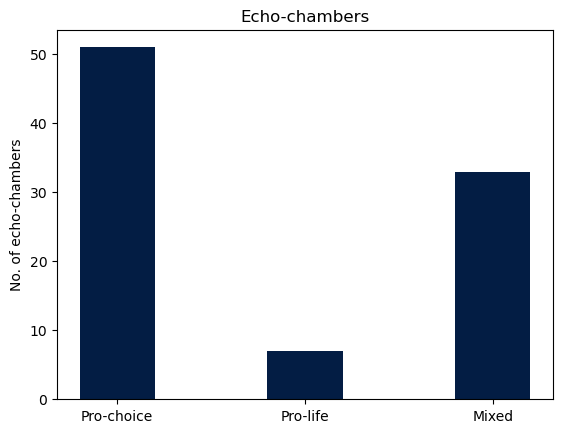

In [113]:
data = {
    'Pro-choice':prochoice_echochamber_count,
    'Pro-life':prolife_echochamber_count,
    'Mixed':mixed_post_count
}

attributes =  list(data.keys())
values = list(data.values())

plt.bar(attributes, values, color ="#031D44", width = 0.4)
 
plt.ylabel("No. of echo-chambers")
plt.title("Echo-chambers")
plt.show()

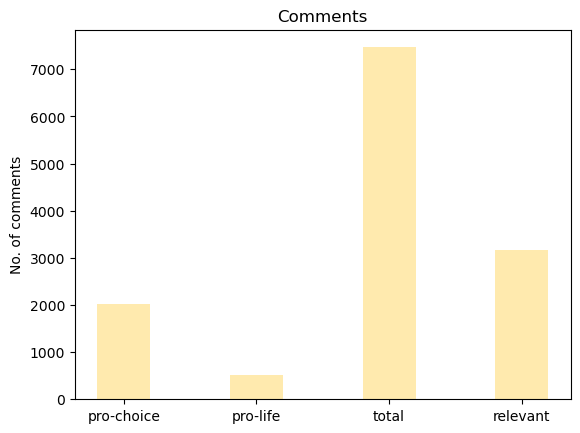

In [114]:
data = {
    'pro-choice':prochoice_comment_count,
    'pro-life':prolife_comment_count,
    'total':total_comment_count,
    'relevant':total_relevant_comment_count
}

attributes =  list(data.keys())
values = list(data.values())

plt.bar(attributes, values, color ="#FFEAAE", width = 0.4)
 
plt.ylabel("No. of comments")
plt.title("Comments")
plt.show()

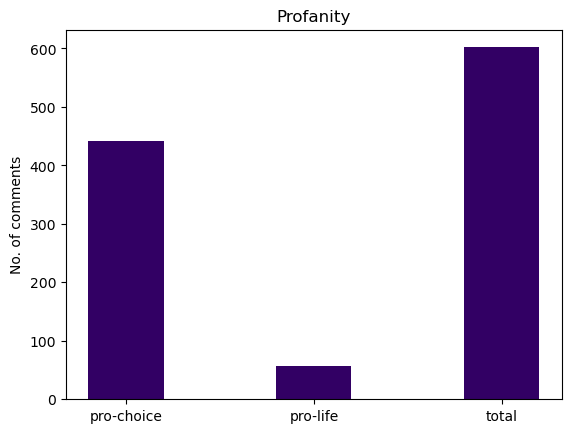

In [115]:
data = {
    'pro-choice':prochoice_profanity_comment_count,
    'pro-life':prolife_profanity_comment_count,
    'total':total_profanity_comment_count
}

attributes =  list(data.keys())
values = list(data.values())

plt.bar(attributes, values, color ="#320064", width = 0.4)
 
plt.ylabel("No. of comments")
plt.title("Profanity")
plt.show()